In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools as itr
import copy
from boundaries import WallBoundary, PressureBoundary, VelocityBoundary
from generators import WallGenerators
from simulation import Simulation
import pandas as pd
import random
from openpyxl import load_workbook

In [7]:
boundaryTest = np.load("img_test.npy")
print(boundaryTest)

[[ True  True  True ...  True  True  True]
 [ True  True  True ... False False  True]
 [ True  True  True ... False False  True]
 ...
 [ True False False ...  True  True  True]
 [ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [8]:
yResolution = 32
xResolution = 32
ACspeed = 1

walls = WallBoundary(yResolution, xResolution)
walls.boundary = boundaryTest
walls.generateIndex()
walls.generateACDirections()
walls.indexPossibleACPos()

Total Number Of Cobinations: 138
[(2, 13), (3, 13), (4, 13), (5, 13), (6, 13), (7, 13), (8, 13), (9, 13), (10, 12), (11, 11), (11, 10), (11, 9), (11, 8), (11, 7), (11, 6), (11, 5), (11, 4), (11, 3), (11, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (30, 2), (30, 3), (29, 3), (28, 3), (27, 3), (26, 3), (25, 3), (24, 3), (23, 3), (22, 3), (21, 3), (20, 3), (19, 3), (18, 4), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (19, 12), (20, 13), (21, 13), (22, 12), (23, 13), (23, 14), (23, 15), (22, 16), (22, 17), (22, 18), (22, 19), (22, 20), (22, 21), (22, 22), (22, 23), (22, 24), (22, 25), (22, 26), (22, 27), (22, 28), (22, 29), (22, 30), (21, 30), (20, 30), (19, 30), (18, 30), (17, 30), (16, 30), (15, 30), (14, 30), (13, 30), (12, 30), (11, 30), (10, 30), (9, 30), (8, 30), (7, 30), (6, 30), (5, 30), (4, 30), (3, 30), (2, 30), (1, 30), 

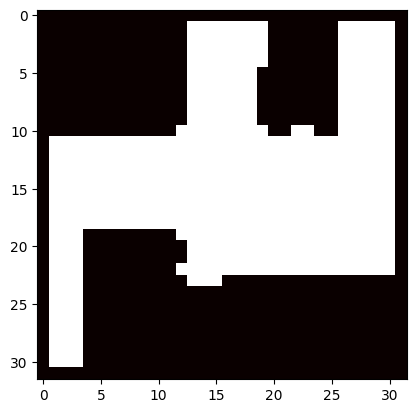

In [10]:
total = len([i for i in walls.possibleACIndex])
print(f"Total Number Of Cobinations: {total}")
start = 1
print(walls.possibleACIndex)

#plt.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")

results = []

for index, pos in enumerate(walls.possibleACIndex):
    print(f"Simulation batch {start}/{total}")
    simTimes = []
    for directionIndex, direction in enumerate(WallBoundary.unitVect):
        #print(f"Trying direction: {direction}...")
        pathOfFlow = [i+j for i, j in zip(pos, direction)]
        if (not walls.boundary[pathOfFlow[0], pathOfFlow[1]]):
            #print("Works! Testing now...")
            velocityInlet = [VelocityBoundary(pos[0], pos[1], ACspeed, directionIndex)]
            initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
            simulation = Simulation(
                yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=[]
            )
            simTime, stable = simulation.simulateUntilEquilibrium(equilibriumThreshold=2.5, limit = 500)
            #print("Done!")
            if not stable or simTime == 500:
                #print("It exploded :() or didn't equalize")
                break
            simTimes.append(simTime)
        #else:
            #print("Doesn't work! Moving on...")
        #print("\n")
    results.append(np.average(simTimes))
    start += 1
    #print("--------------")
    
plt.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")

lowest = min(results)
most = max(results)
ansIndex = [index for index, result in enumerate(results) if result == lowest][0]
ansPos = walls.possibleACIndex[ansIndex]

print(f"position: {ansPos} Momentum: {results[ansIndex]}")

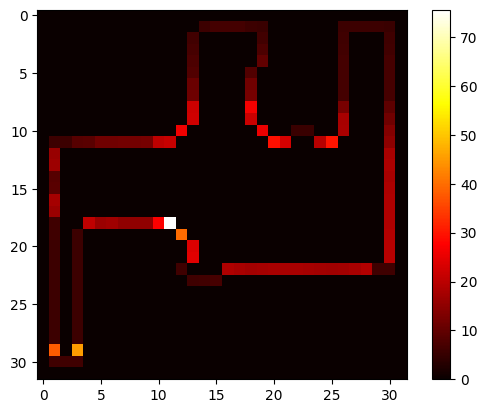

In [ ]:
fig, ax = plt.subplots()

room = np.zeros((yResolution, xResolution))
for i in range(len(results)):
    room[walls.possibleACIndex[i]] = results[i]

#init = np.append(init, export, axis=1)
#print(room)

heatmap  = ax.imshow(room, cmap="hot", interpolation="nearest")
ax.scatter([ansPos[1]], [ansPos[0]])
fig.colorbar(heatmap)